# Advanced Regression

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Steps followed to build this model

1. Importing Libraries
2. Data Understanding
3. Data Preparation
4. Data Exploration
5. Data Preprocessing
6. Data Modeling
7. Inference and Recomendation


##### Step 1: Importing Libraries

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import norm, skew 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)

##### Step 2: Data Understanding

In [2]:
#Loading the past housing price data from csv into a dataframe
housing_df=pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Checking number of Rows and Columns
housing_df.shape

(1460, 81)

In [4]:
#Checking for data types and missing values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Step 3. Data preparation

In [5]:
#Checking the number of missing values and its percentage
Total_missing = housing_df.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

,Total_missing_values,Percent_missing_values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [6]:
#Create a new dataframe named cleaned_df with all columns with data missing < 80% for our  further analysis

cleaned_df = housing_df.loc[:,(100*housing_df.isnull().sum()/housing_df.shape[0]).sort_values(ascending = False) < 80]
cleaned_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
#Checking for columns having majority of single values for the dataset and percentage of single value in each column
cleaned_df.nunique().sort_values(ascending=False)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
LotFrontage       110
GarageYrBlt        97
ScreenPorch        76
YearRemodAdd       61
Neighborhood       25
LowQualFinSF       24
MiscVal            21
3SsnPorch          20
Exterior2nd        16
Exterior1st        15
MSSubClass         15
TotRmsAbvGrd       12
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
Condition2          8
HouseStyle          8
RoofMatl            8
PoolArea            8
Functional          7
SaleCondition       6
GarageType          6
Heating             6
BsmtFinType1        6
BsmtFinType2        6
Foundation          6
RoofStyle 

In [9]:
#Drop the column Id since its not contributing to model building
cleaned_df.drop(['Id'],axis=1,inplace=True)
cleaned_df.shape

(1460, 76)

In [10]:
# Get the value counts of all the columns
for column in cleaned_df:
    print(cleaned_df[column].astype('category').value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
63.0      17
79.0      17
55.0      17
72.0      17
100.0     16
51.0      15
74.0      15
66.0      15
52.0      14
59.0      13
71.0      12
82.0      12
57.0      12
67.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
86.0      10
88.0      10
34.0      10
92.0      10
77.0       9
84.0       9
62.0       9
44.0       9
35.0       9
98.0       8
96.0       8
93.0       8
61.0       8
58.0       7
120.0      7
107.0      7
95.0       7
105.0      6
89.0       6
94.0       6
36.0  

In [11]:
#Data imputation for categorical columns
cleaned_df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [12]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
cleaned_df['GarageQual'] = cleaned_df['GarageQual'].replace(np.nan,'TA')

In [13]:
cleaned_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [14]:
cleaned_df['GarageFinish']=cleaned_df['GarageFinish'].replace(np.nan,'Unknown')

In [15]:
cleaned_df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
cleaned_df['GarageType'] = cleaned_df['GarageType'].replace(np.nan,'Attchd')

In [17]:
cleaned_df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [18]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
cleaned_df['GarageCond'] = cleaned_df['GarageCond'].replace(np.nan,'TA')

In [19]:
#NA = No Fireplace for FireplaceQu
cleaned_df['FireplaceQu'] = cleaned_df['FireplaceQu'].fillna('None')

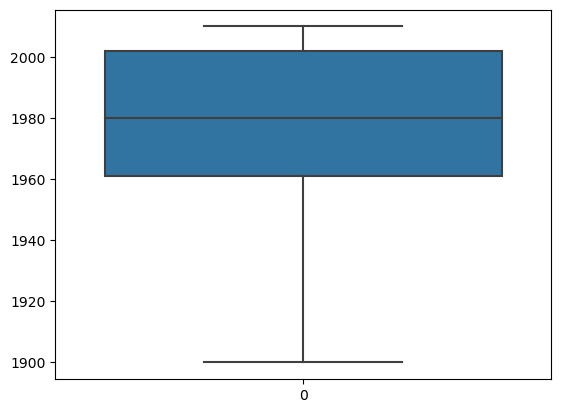

In [20]:
#Data Imputation for numerical columns
#plots for outlier analysis of GarageYrBlt
sns.boxplot(cleaned_df.GarageYrBlt)
plt.show()

In [21]:
#There are no outliers so imputing missing values with mean
cleaned_df['GarageYrBlt'].fillna(cleaned_df['GarageYrBlt'].mean(),inplace=True)

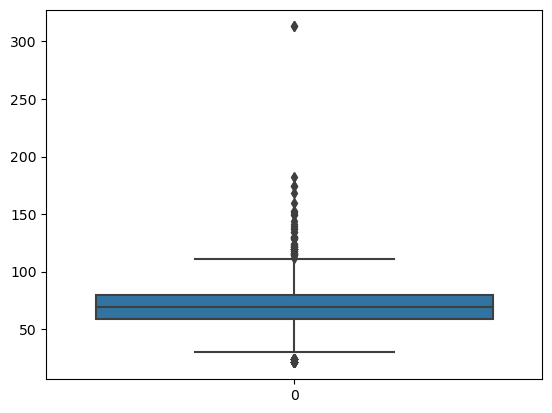

In [22]:
#plots for outlier analysis of LotFrontage
sns.boxplot(cleaned_df.LotFrontage)
plt.show()

In [23]:
#As there are outliers imputing with median
cleaned_df['LotFrontage'].fillna(cleaned_df['LotFrontage'].median(),inplace=True)

In [24]:
#Final check of missing values 
missing = cleaned_df.isnull().sum().sort_values(ascending = False)
missing_perc = (100*cleaned_df.isnull().sum()/cleaned_df.shape[0]).sort_values(ascending = False)
missing_values = pd.concat([missing,missing_perc], axis=1, keys=['missing_values', 'missing_percent'])
missing_values

,missing_values,missing_percent
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
MSSubClass,0,0.000000
Functional,0,0.000000


##### Step 5: Data Exploration

Univariate analysis

In [25]:
cleaned_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [26]:
# Extracting the Year Features from the Dataset and then checking how the price varies with respect to the age of the estate
yr_cols = []
for i in cleaned_df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        yr_cols.append(i)
print(yr_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


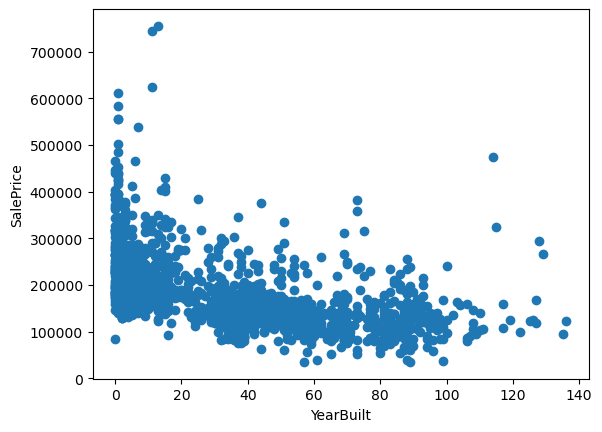

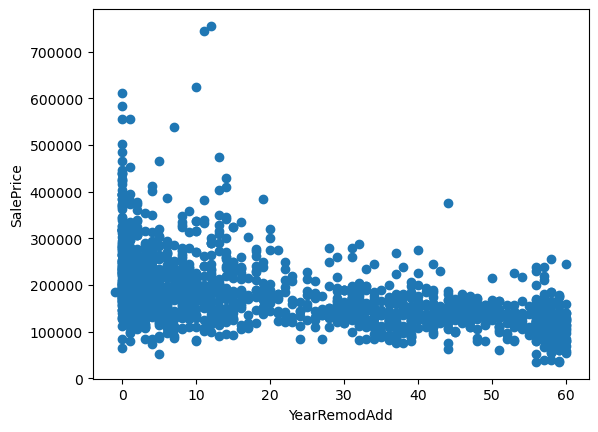

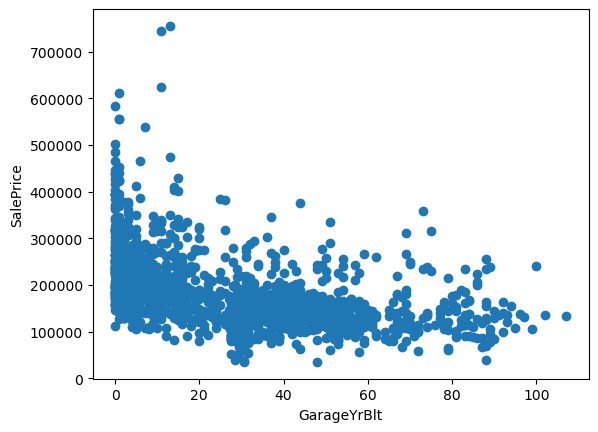

In [27]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sale Price
for feature in yr_cols:
    if feature!='YrSold':
        data=cleaned_df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

This shows that new houses are costlier which is inline with our intuition

In [28]:
numeric_features = cleaned_df.dtypes[cleaned_df.dtypes != "object"].index
numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

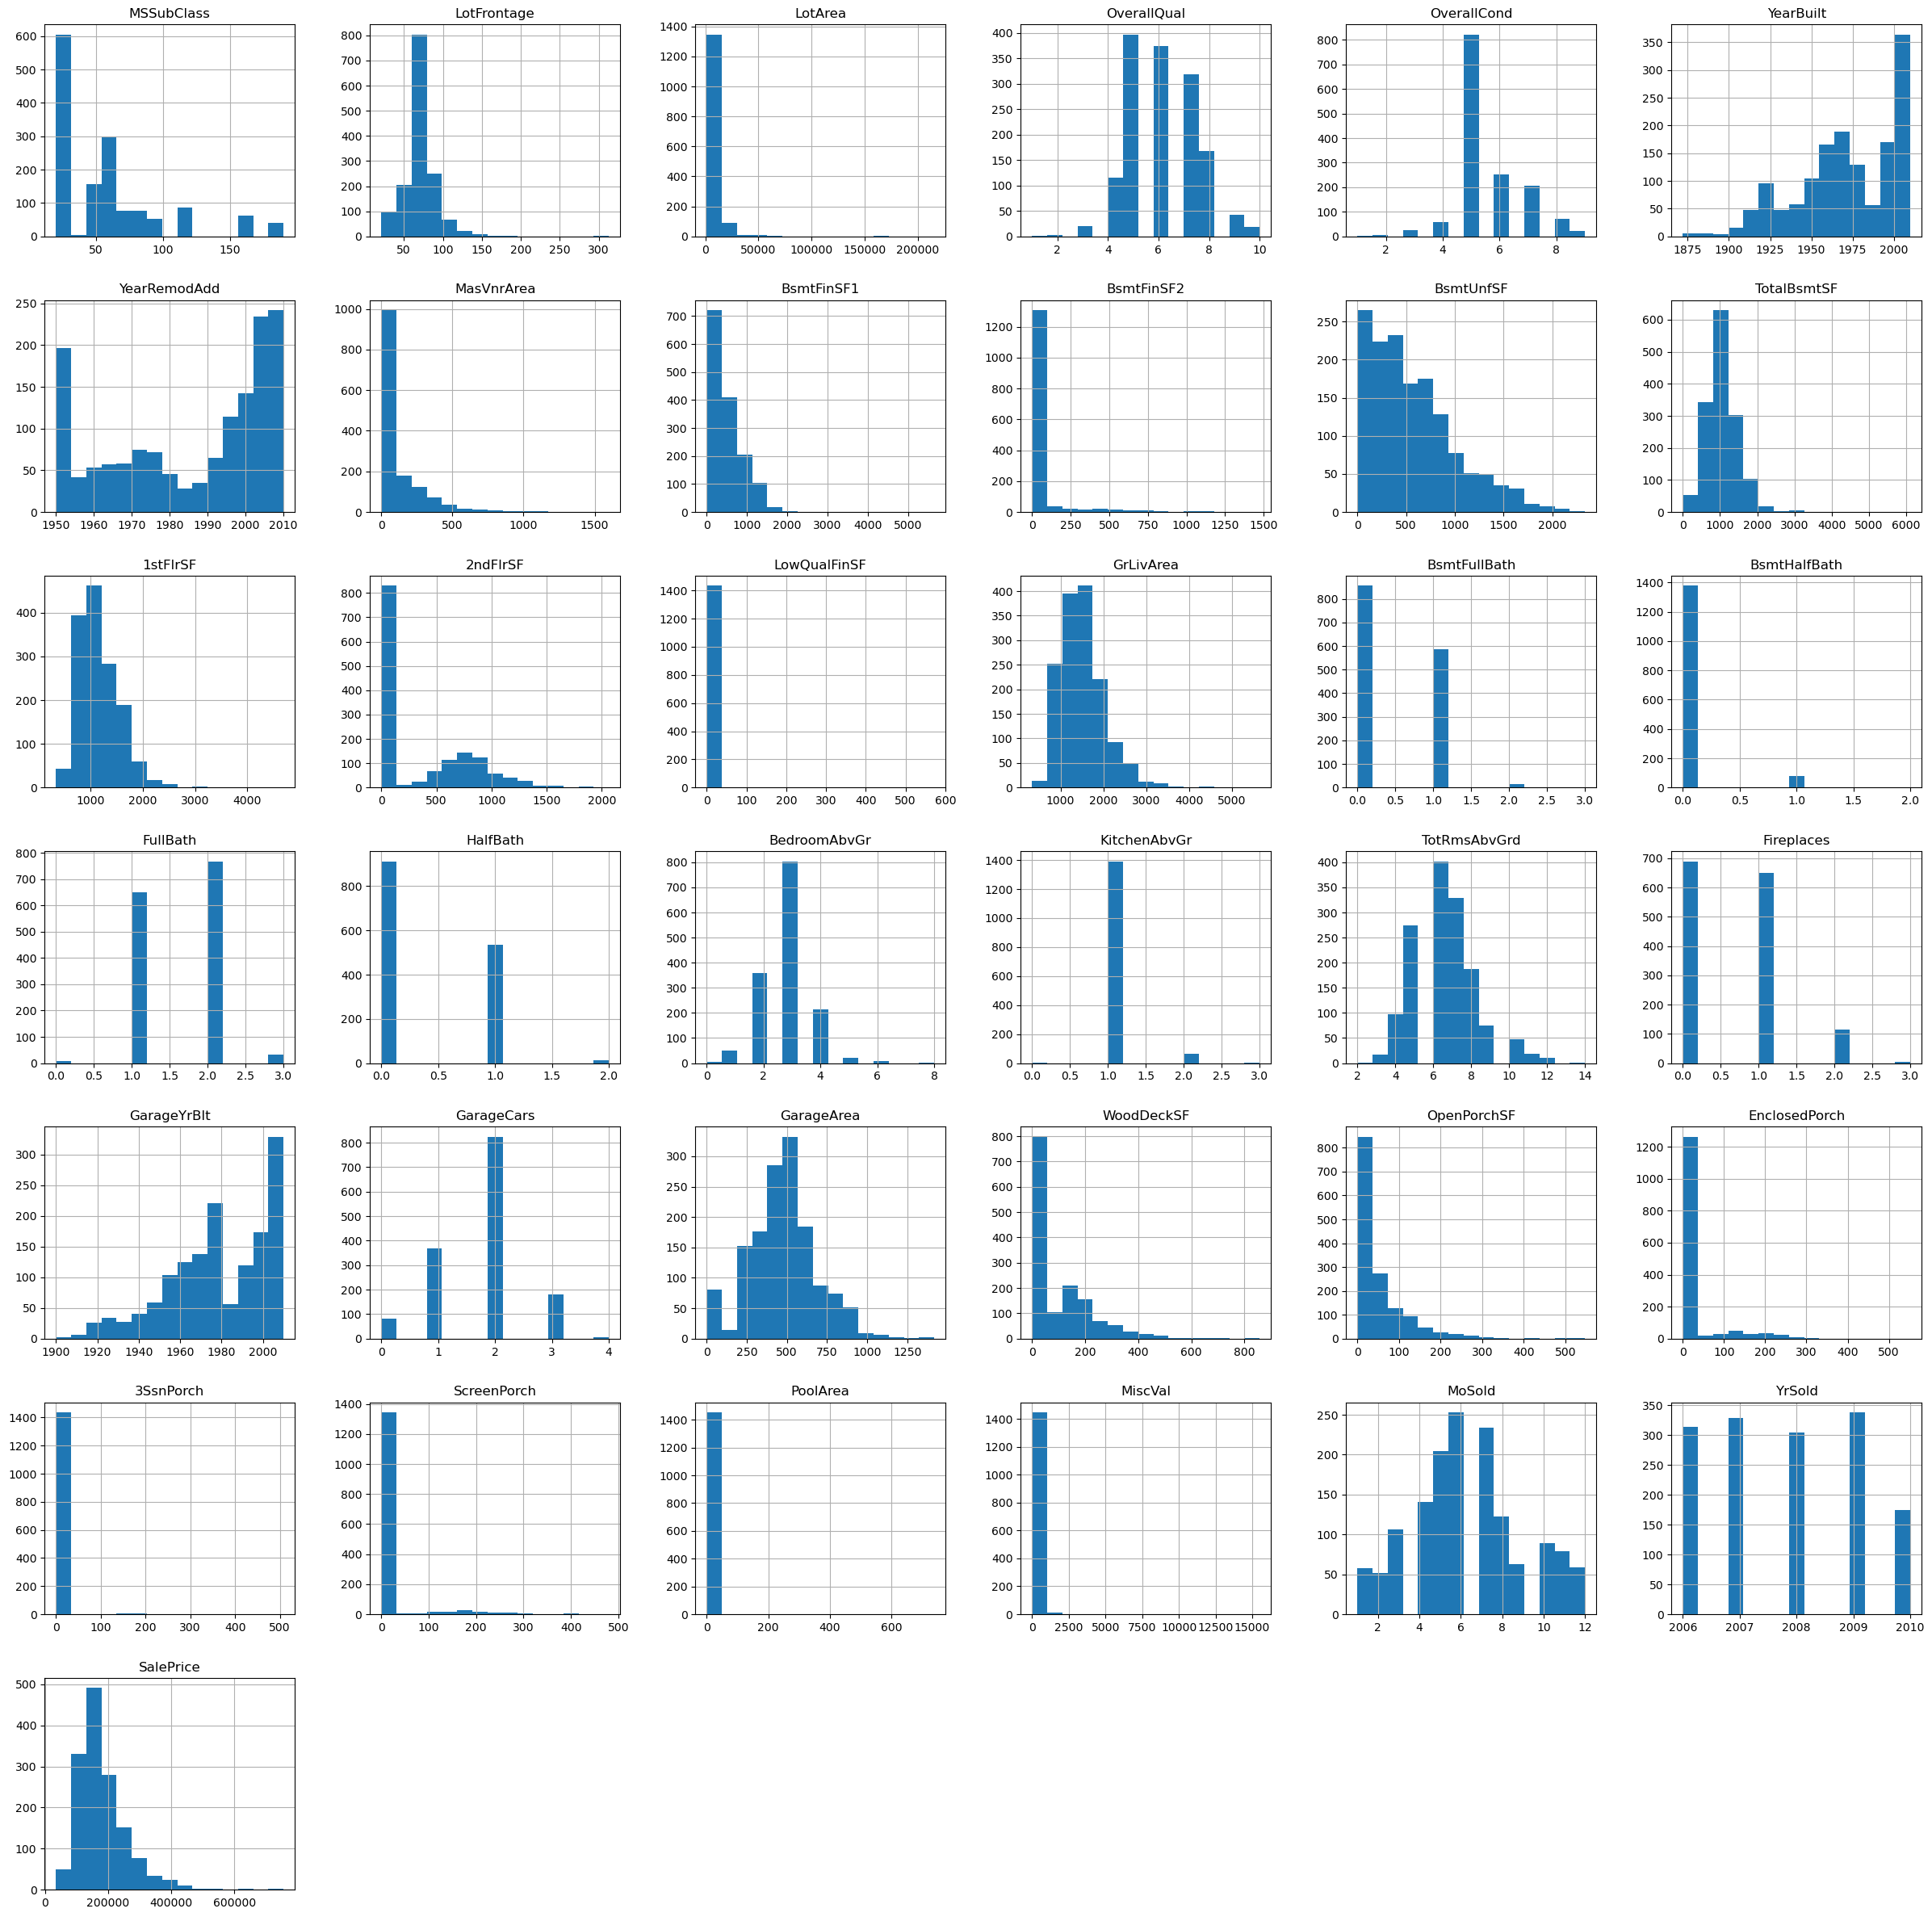

In [29]:
cleaned_df[numeric_features].hist(bins=15, figsize=(30, 30))
plt.show()

In [30]:
# correlation matrix
corr = cleaned_df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.179459,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.179459,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


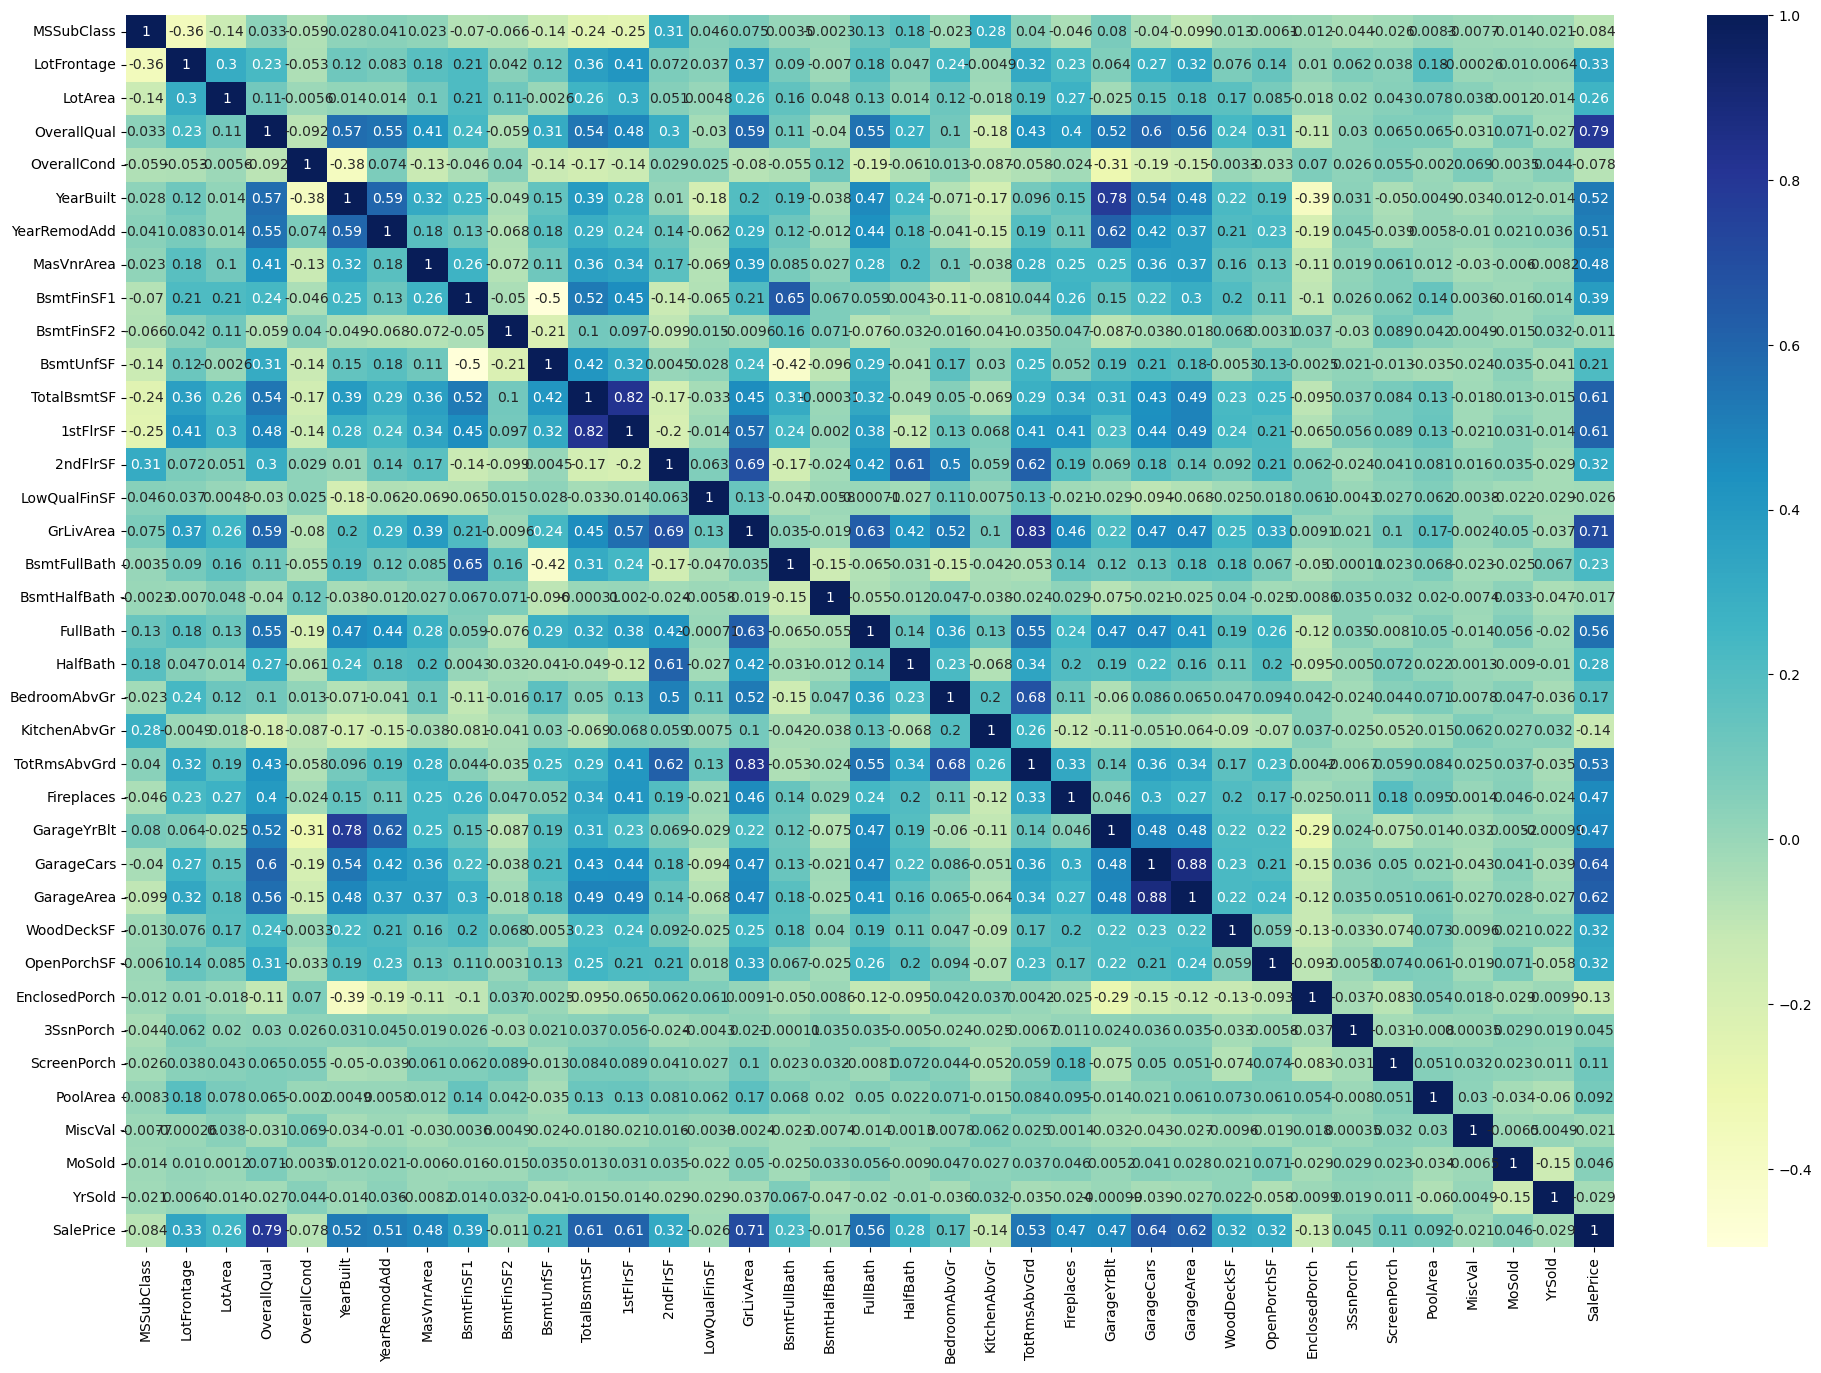

In [31]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Inferences: Based on the correlation we can make few following interpretions

* SalePrice is very high positively correlated to the OverallQual(0.79)
* SalePrice is very high positively correlated to the GrLivArea (0.71)
* SalePrice is very high positively correlated to the GarageCars(0.64)
* SalePrice is very high positively correlated to the GarageArea(0.62)
* SalePrice is very high positively correlated to the TotalBsmtSF (0.61)
* SalePrice is very high positively correlated to the 1stFlrSF (0.61)
* SalePrice is very high positively correlated to the FullBath(0.58)
* SalePrice is very high positively correlated to the TotRmsAbvGrd(0.55)
* SalePrice is very high positively correlated to the YearBuilt(0.52)
* SalePrice is very high negatively correlated to the YearRemodAdd(0.5)

###### Bivariate analysis of these top 10 correlated variables with saleprice using pairplot

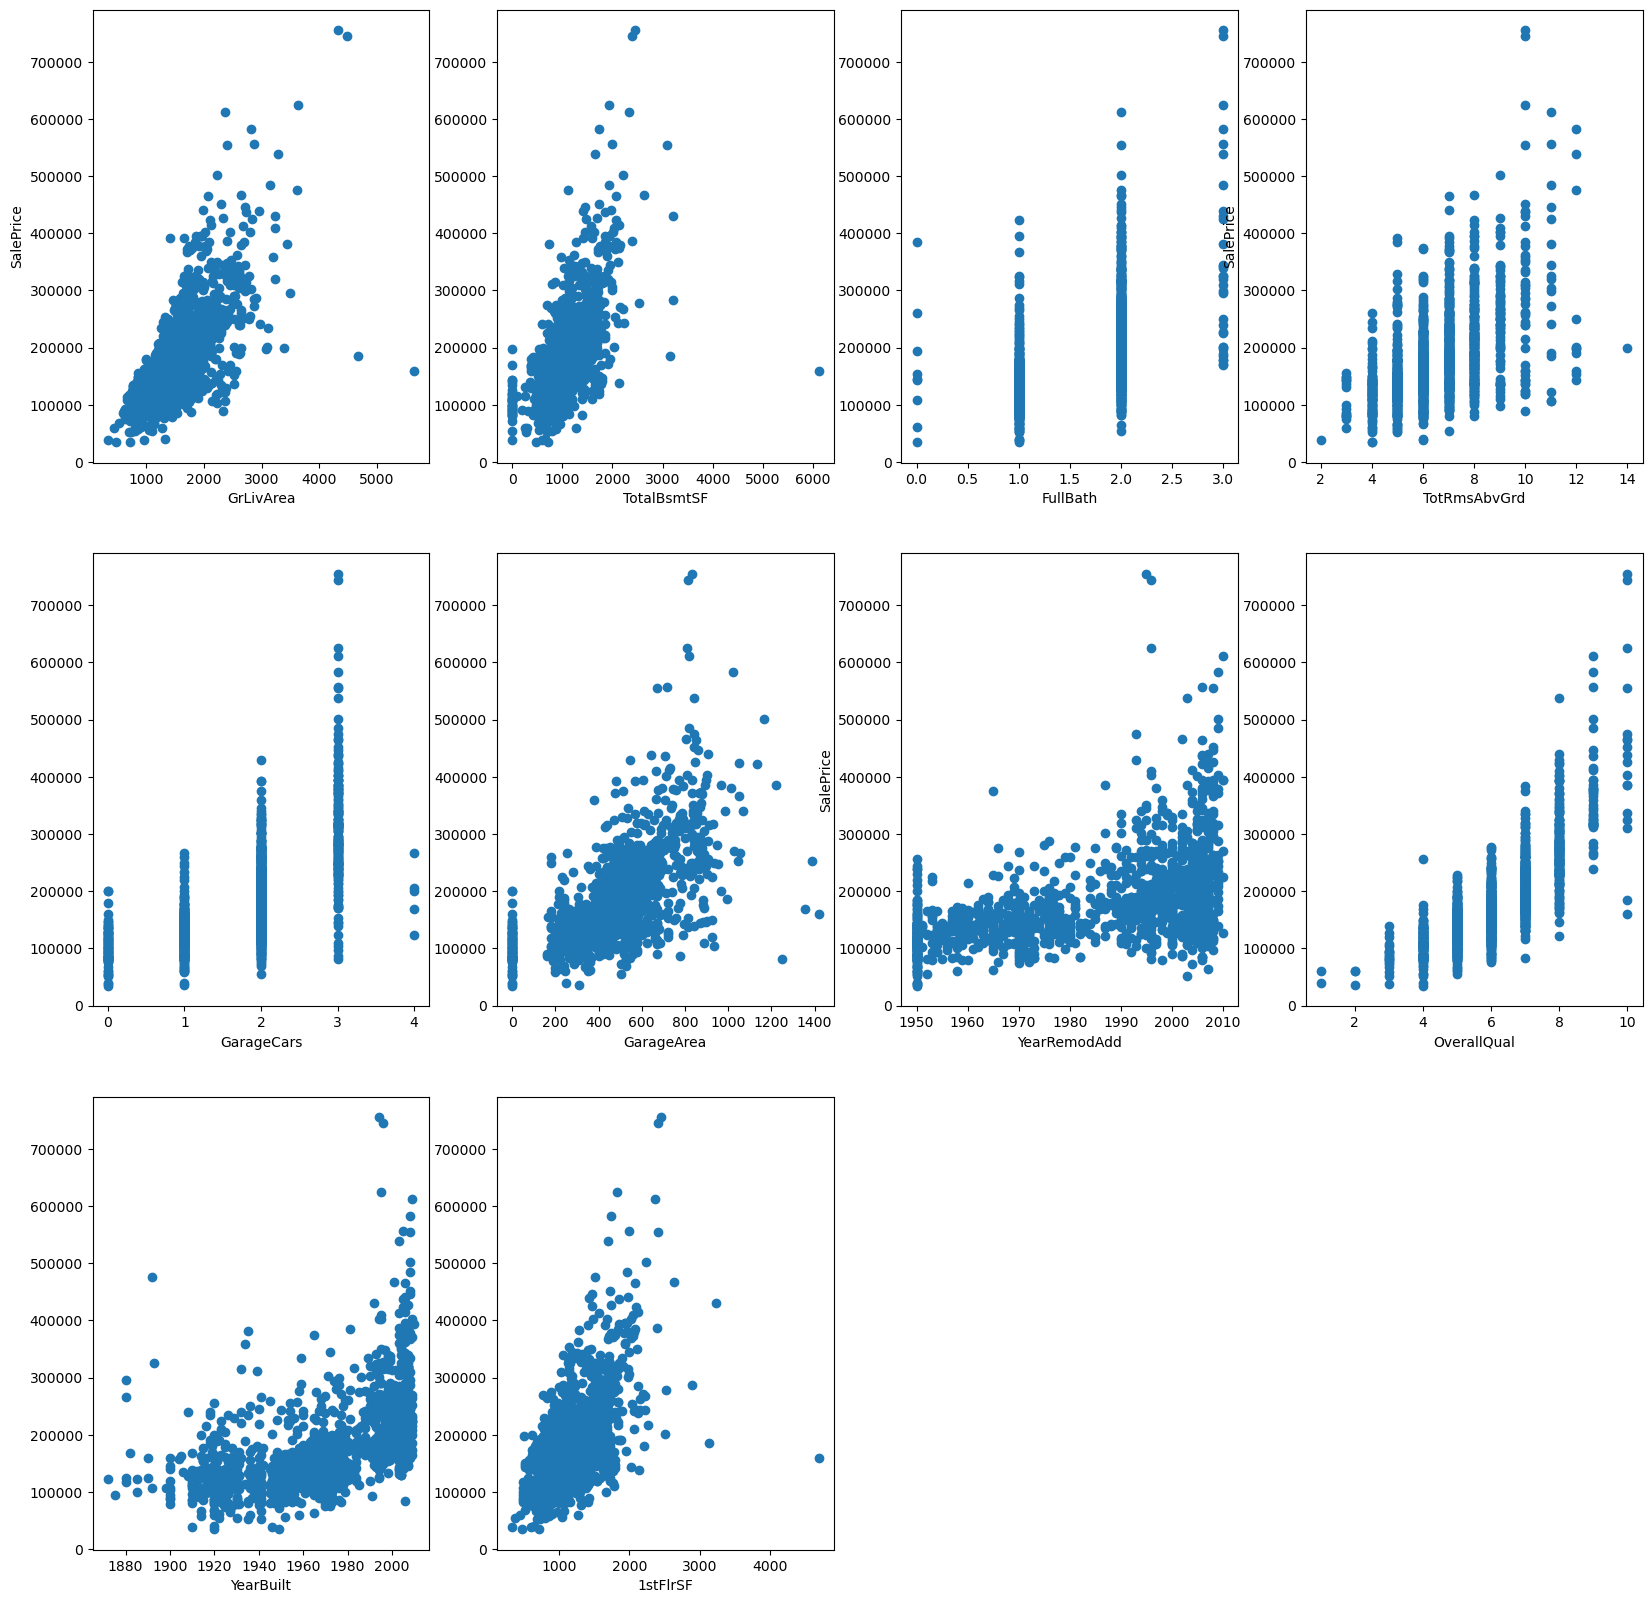

In [32]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,4,1)
plt.scatter(cleaned_df.GrLivArea, cleaned_df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.subplot(3,4,2)
plt.scatter(cleaned_df.TotalBsmtSF, cleaned_df.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.subplot(3,4,3)
plt.scatter(cleaned_df.FullBath, cleaned_df.SalePrice)
plt.xlabel('FullBath')
plt.subplot(3,4,4)
plt.scatter(cleaned_df.TotRmsAbvGrd, cleaned_df.SalePrice)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.subplot(3,4,5)
plt.scatter(cleaned_df.GarageCars, cleaned_df.SalePrice)
plt.xlabel('GarageCars')
plt.subplot(3,4,6)
plt.scatter(cleaned_df.GarageArea, cleaned_df.SalePrice)
plt.xlabel('GarageArea')
plt.subplot(3,4,7)
plt.scatter(cleaned_df.YearRemodAdd, cleaned_df.SalePrice)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.subplot(3,4,8)
plt.scatter(cleaned_df.OverallQual, cleaned_df.SalePrice)
plt.xlabel('OverallQual')
plt.subplot(3,4,9)
plt.scatter(cleaned_df.YearBuilt, cleaned_df.SalePrice)
plt.xlabel('YearBuilt')
plt.subplot(3,4,10)
plt.scatter(cleaned_df['1stFlrSF'], cleaned_df.SalePrice)
plt.xlabel('1stFlrSF')
plt.show()

Inferences :

* We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing the regresssion model.
* We even observe that variables like FullBath, GarageCars, TotRmsAbvGrd and OverallQual are not continuously distributed so we can encode them according to their characteristics.

In [33]:
category_features  = cleaned_df.dtypes[cleaned_df.dtypes == "object"].index
category_features  

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

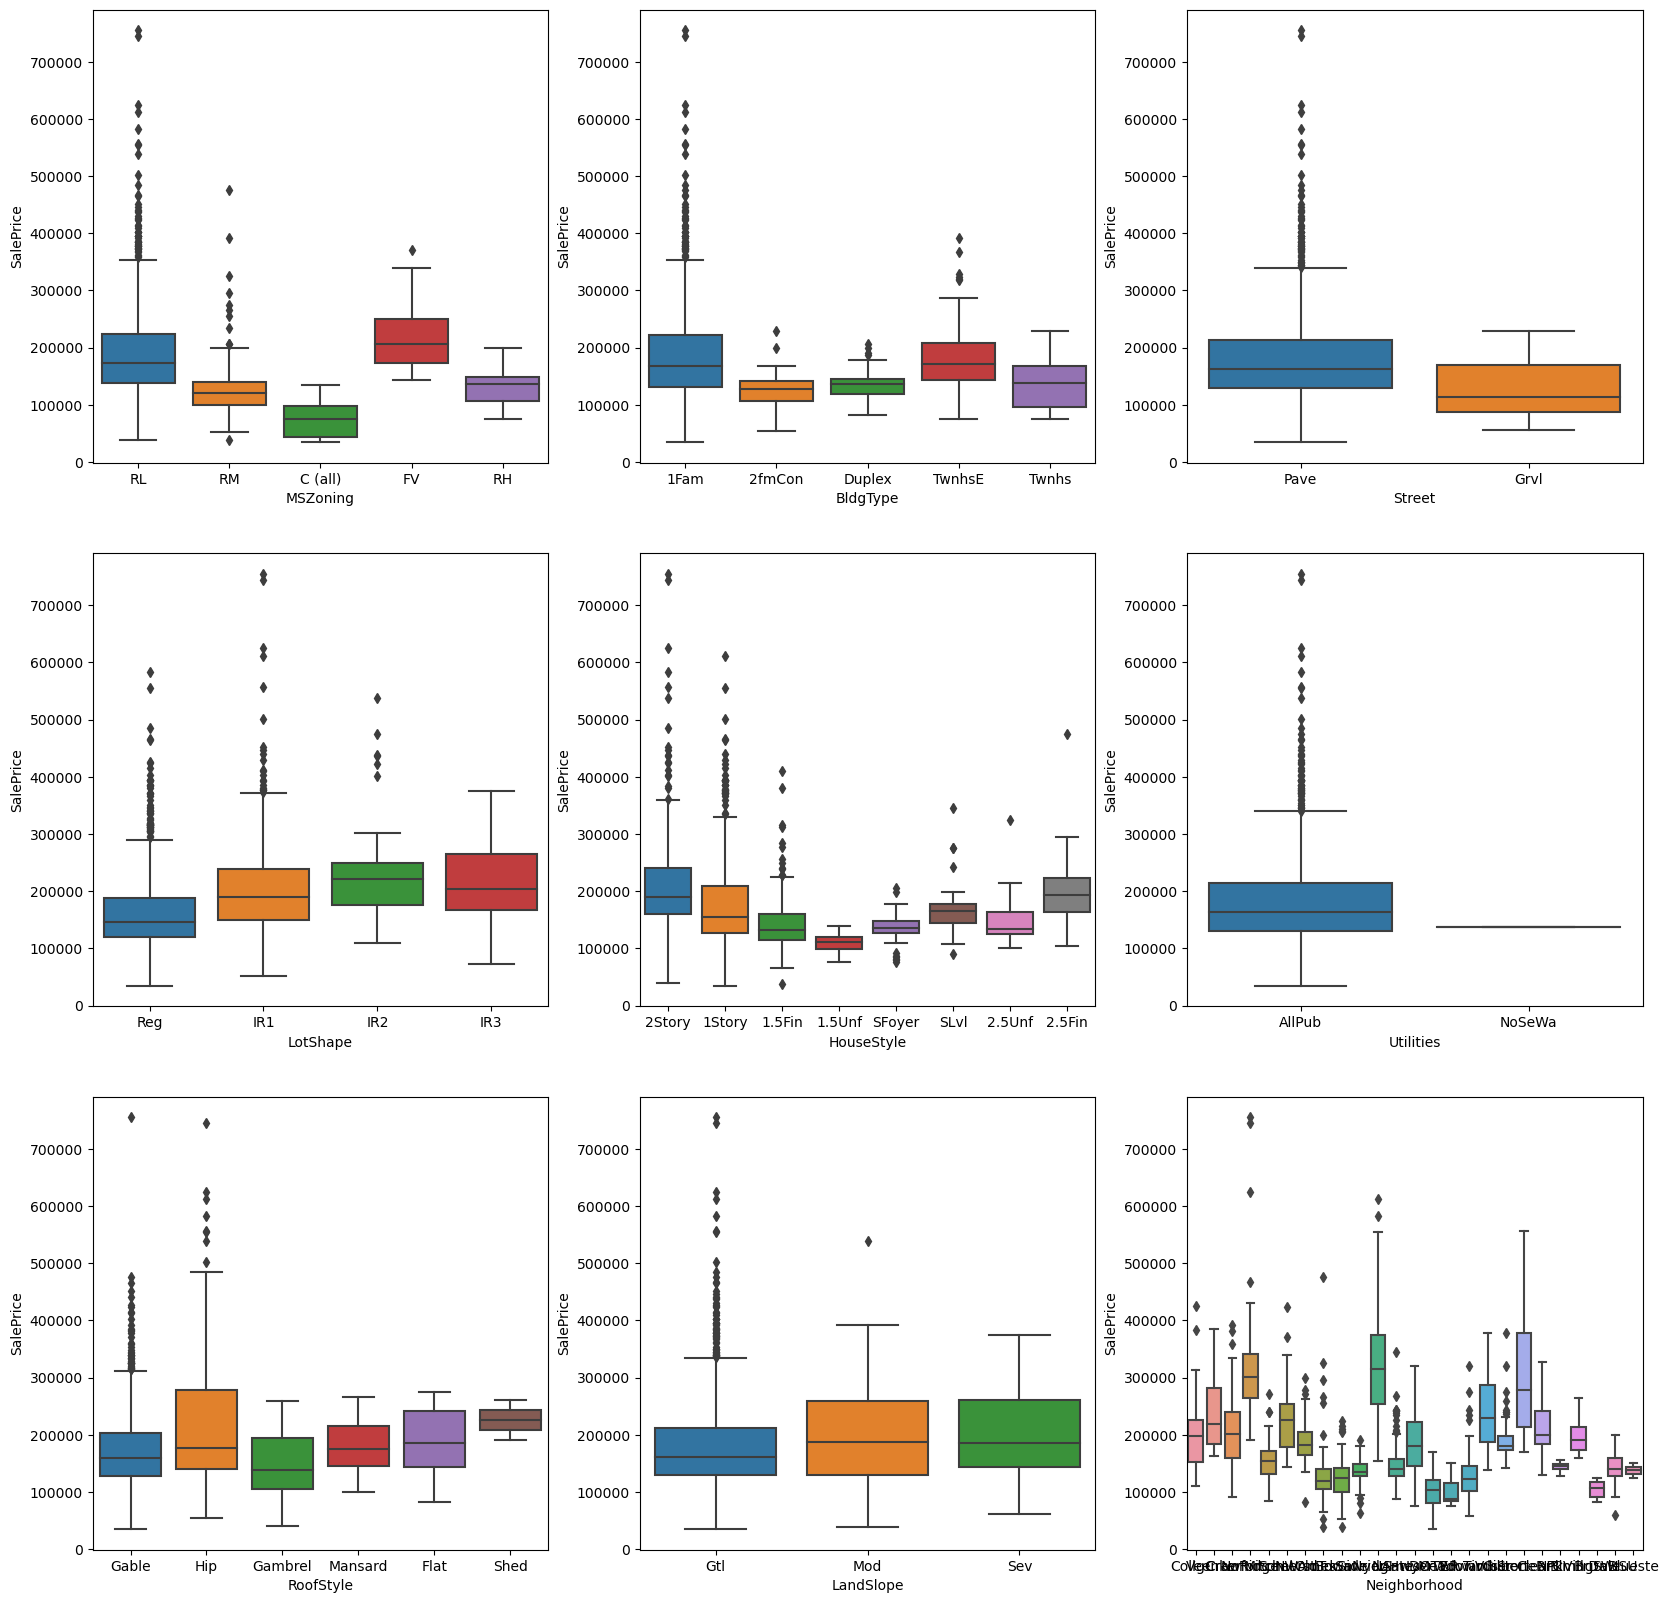

In [34]:
# EDA for few categorical columns- the columns which might be useful predicting the sale price(based on our business understanding and meta data)
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,3)
sns.boxplot(x='Street', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood', y="SalePrice", data=cleaned_df)
plt.show()

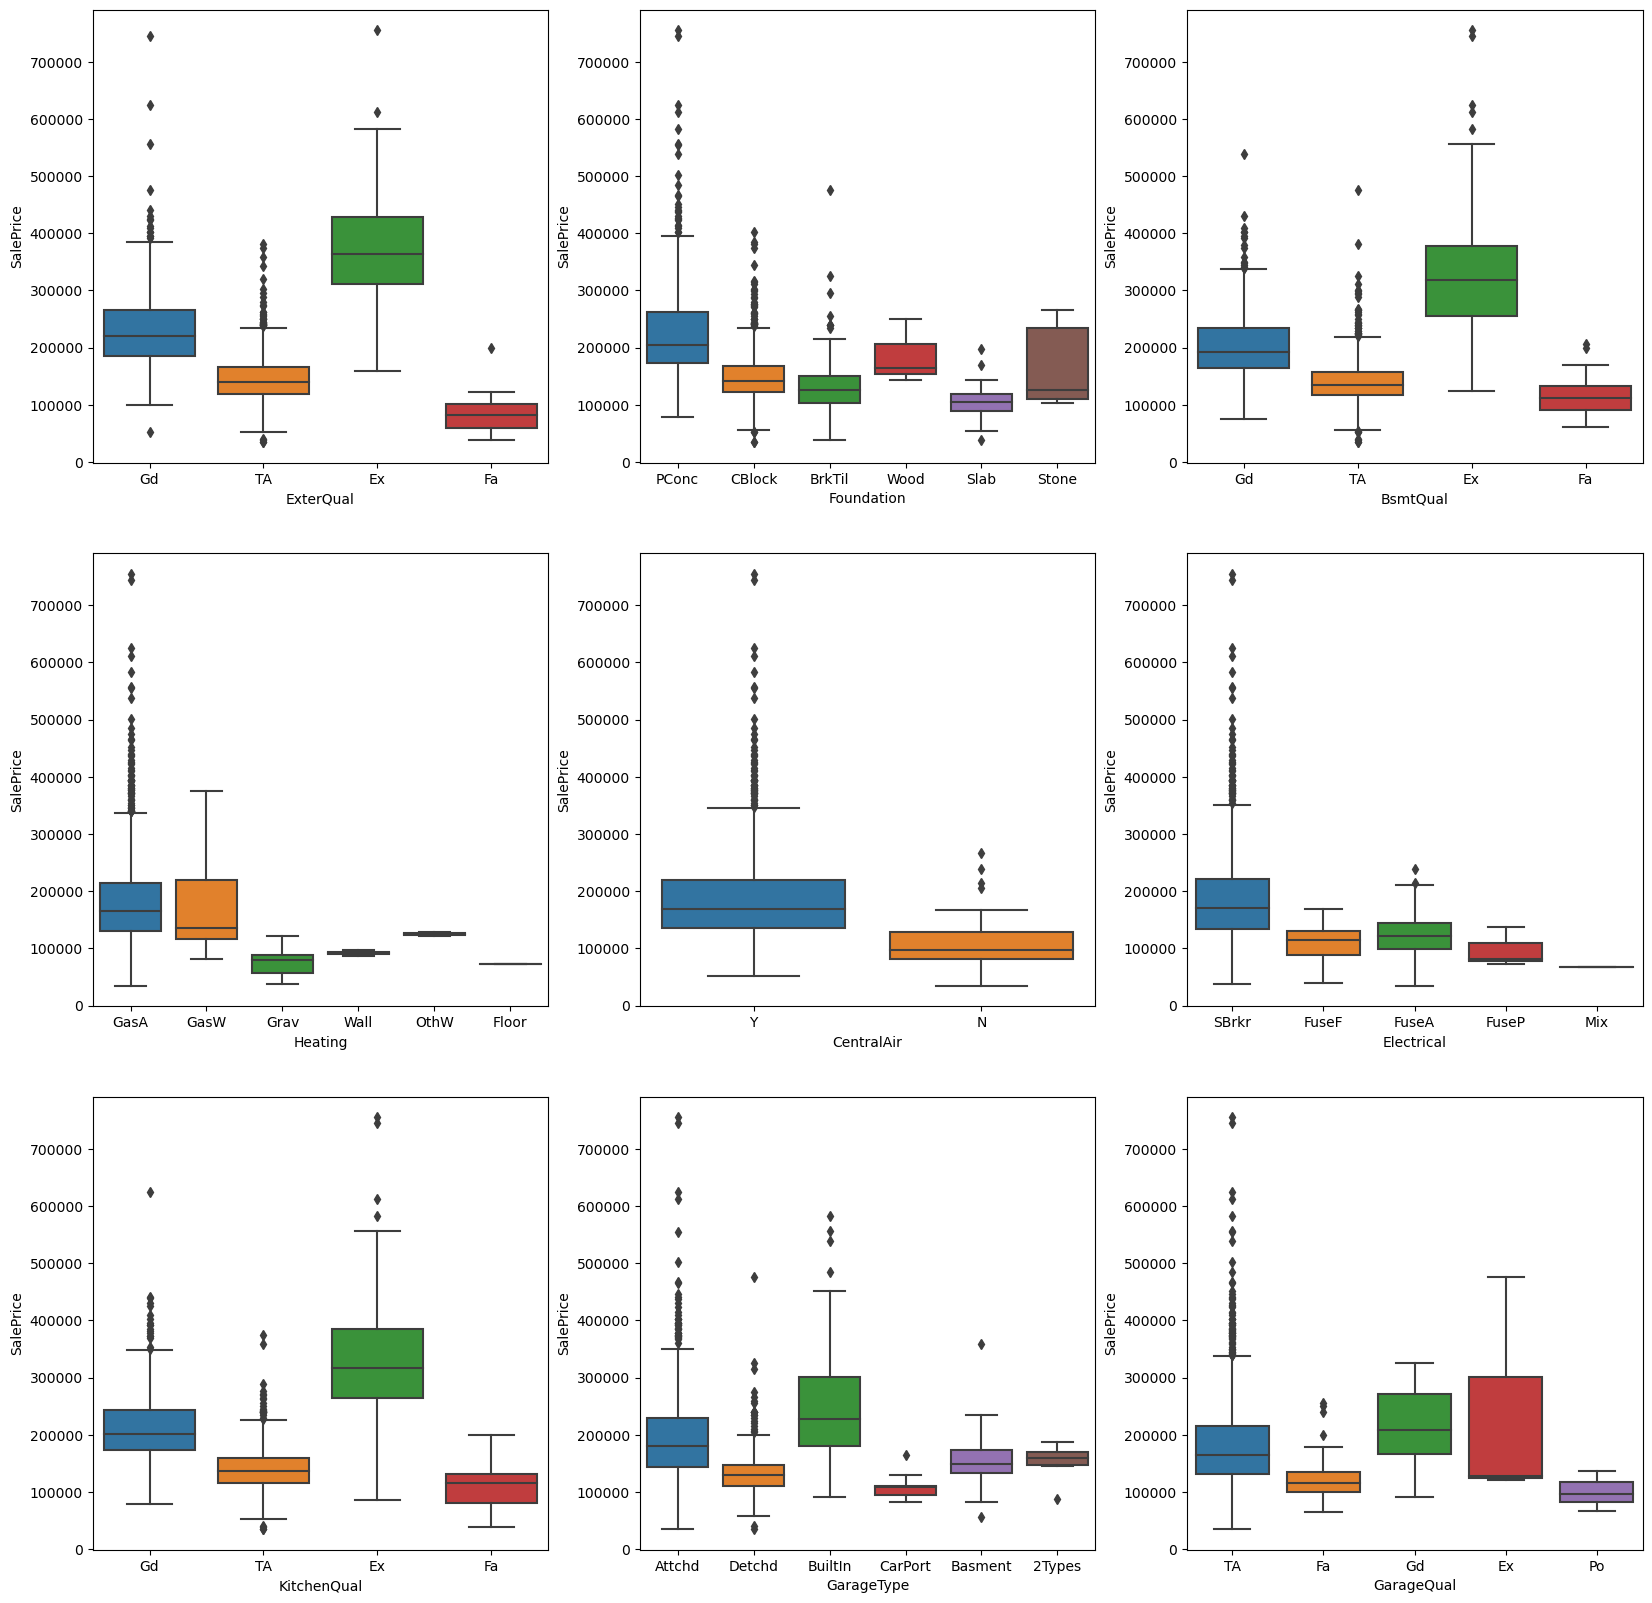

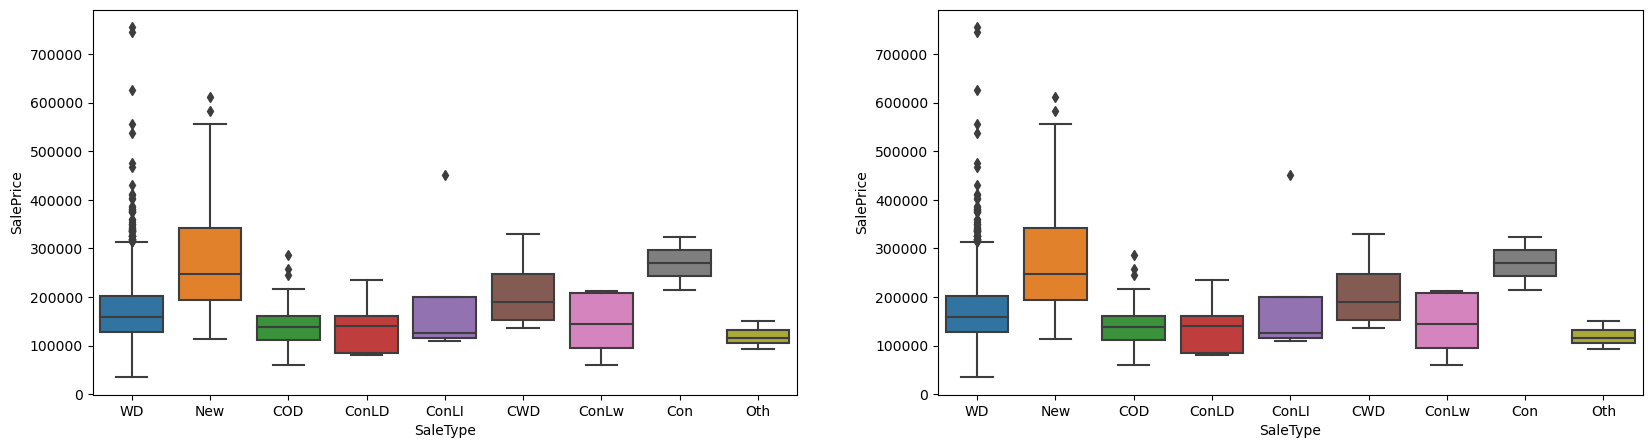

In [35]:
plt.figure(figsize = (20,20)) 
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,4)
sns.boxplot(x='Heating', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType', y="SalePrice", data=cleaned_df)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual', y="SalePrice", data=cleaned_df)
plt.show()
plt.figure(figsize = (20,5)) 
plt.subplot(1,2,1)
sns.boxplot(x='SaleType', y="SalePrice", data=cleaned_df)
plt.subplot(1,2,2)
sns.boxplot(x='SaleType', y="SalePrice", data=cleaned_df)
plt.show()

Inferences -

* MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
* The Street of type 'Pave' has more Sale Price when compared to 'Grvl'
* the utlities columns have most of its values as 'AllPub'. So this column doesnt give much of an informration. Its not an important feature.
* The house with Exterior Quality of type Excellent has the highest SalePrice.
* The house with Basement Quality of type Excellent has the highest SalePrice.
* The house with Kitchen Quality of type Excellent has the highest SalePrice.
* The house with Garage Quality of type Excellent has the highest SalePrice.
* The house with Garage Type of type BuiltIn has the highest SalePrice.
* The house with Sale Type of type New has the highest SalePrice.
* The Central air of type 'Yes' has more Sale Price when compared to 'No'

##### Step 5. Data preprocessing

In [36]:
cleaned_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

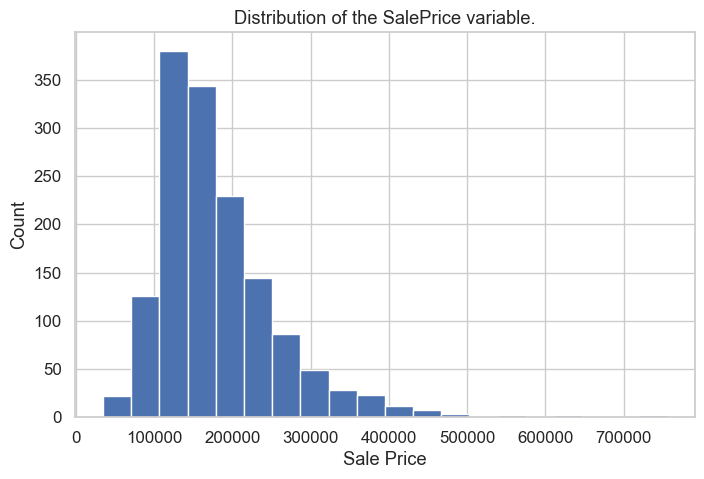

In [37]:
#Check the distribution the SalePrice
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(cleaned_df['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 180921.20 and sigma = 79415.29



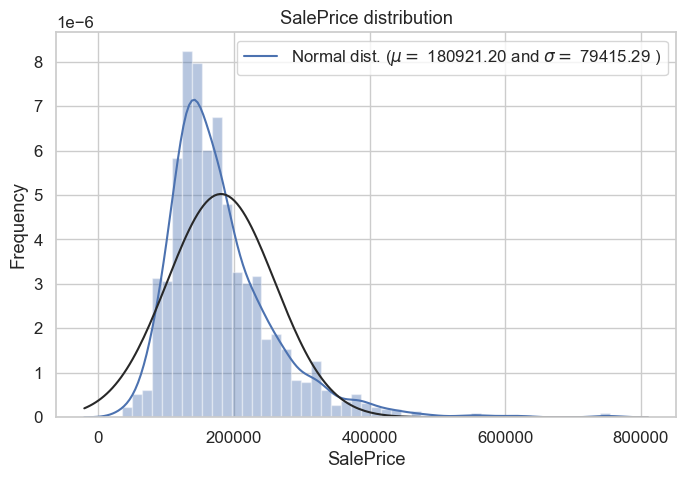

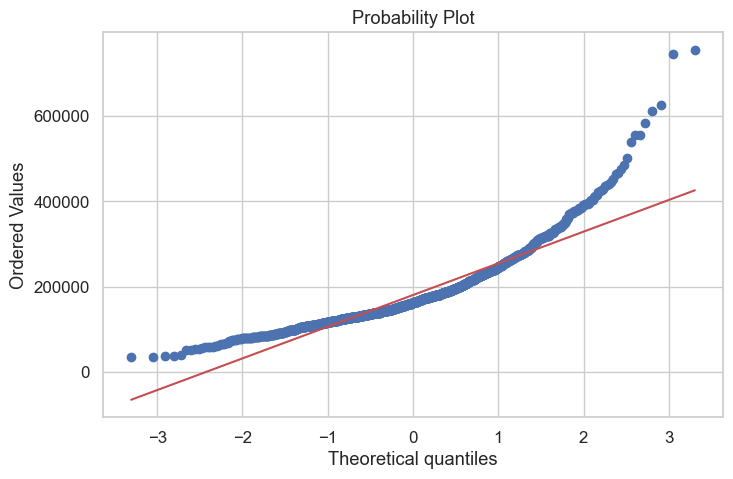

In [38]:
sns.distplot(cleaned_df['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(cleaned_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(cleaned_df['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.We need to transform this variable and make it normally distributed using log tranformation method


 mu = 12.02 and sigma = 0.40



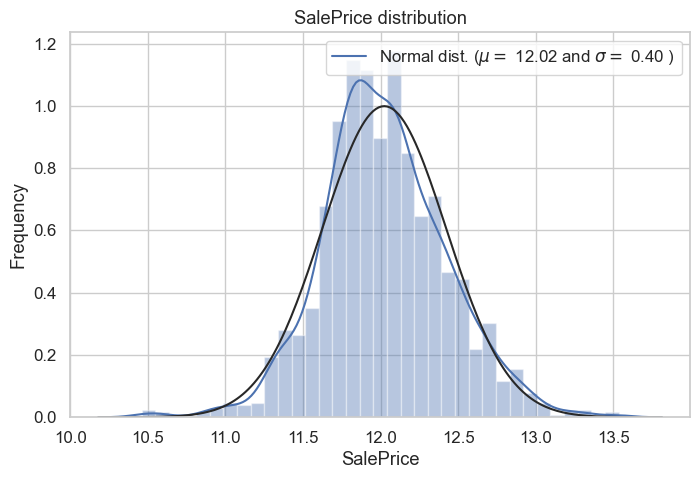

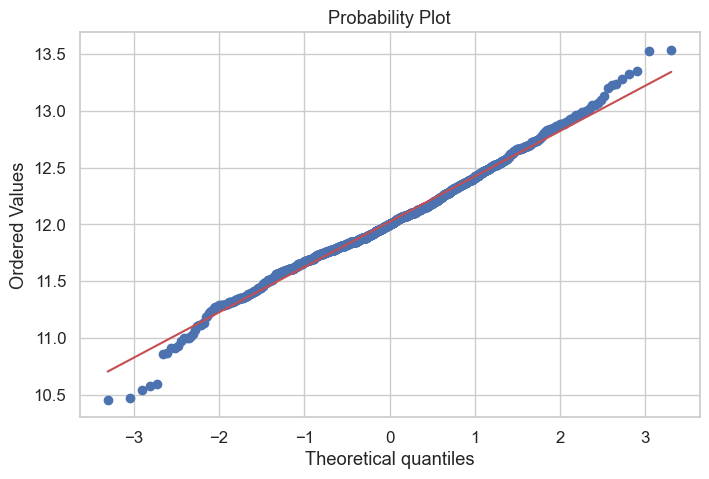

In [39]:
#Log Transformation
cleaned_df["SalePrice"] = np.log(cleaned_df["SalePrice"])

#Checking the new distribution 
sns.distplot(cleaned_df['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(cleaned_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(cleaned_df['SalePrice'], plot=plt)
plt.show()

In [40]:
#check of missing values 
missing = cleaned_df.isnull().sum().sort_values(ascending = False)
missing_perc = (100 * cleaned_df.isnull().sum()/cleaned_df.shape[0]).sort_values(ascending = False)
missing_values = pd.concat([missing,missing_perc], axis=1, keys=['missing_values', 'missing_values_percent'])
missing_values

,missing_values,missing_values_percent
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
MSSubClass,0,0.000000
Functional,0,0.000000


In [41]:
#From the Data Description
#NA = No Basement
cleaned_df['BsmtExposure'] = cleaned_df['BsmtExposure'].fillna('Na')
cleaned_df['BsmtFinType2'] = cleaned_df['BsmtFinType2'].fillna('NA')
cleaned_df['BsmtCond'] = cleaned_df['BsmtCond'].fillna('Na')
cleaned_df['BsmtQual'] = cleaned_df['BsmtQual'].fillna('Na')
cleaned_df['BsmtFinType1'] = cleaned_df['BsmtFinType1'].fillna('NA')
#NA = No Masonery Area
cleaned_df['MasVnrType'] = cleaned_df['MasVnrType'].fillna('None')
cleaned_df['MasVnrArea'] = cleaned_df['MasVnrArea'].fillna(0)
# Filling the Electrical 0.06% rows with the mode
cleaned_df['Electrical'] = cleaned_df['Electrical'].fillna(cleaned_df['Electrical'].mode()[0])

In [42]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

cleaned_df['ExterQual'] = cleaned_df[['ExterQual']].apply(map_function)
cleaned_df['ExterCond'] = cleaned_df[['ExterCond']].apply(map_function)
cleaned_df['BsmtQual'] = cleaned_df[['BsmtQual']].apply(map_function)
cleaned_df['BsmtCond'] = cleaned_df[['BsmtCond']].apply(map_function)
cleaned_df['BsmtExposure'] = cleaned_df[['BsmtExposure']].apply(map_function1)
cleaned_df['BsmtFinType1'] = cleaned_df[['BsmtFinType1']].apply(map_function2)
cleaned_df['BsmtFinType2'] = cleaned_df[['BsmtFinType2']].apply(map_function2)
cleaned_df['HeatingQC'] = cleaned_df[['HeatingQC']].apply(map_function)
cleaned_df['CentralAir'] = cleaned_df[['CentralAir']].apply(map_function3)
cleaned_df['KitchenQual'] = cleaned_df[['KitchenQual']].apply(map_function)
cleaned_df['Functional'] = cleaned_df[['Functional']].apply(map_function4)
cleaned_df['GarageFinish'] = cleaned_df[['GarageFinish']].apply(map_function5)
cleaned_df['GarageQual'] = cleaned_df[['GarageQual']].apply(map_function)
cleaned_df['GarageCond'] = cleaned_df[['GarageCond']].apply(map_function)
cleaned_df['PavedDrive'] = cleaned_df[['PavedDrive']].apply(map_function6)

In [43]:
# Check of missing values 
missing = cleaned_df.isnull().sum().sort_values(ascending = False)
missing_perc = (100 * cleaned_df.isnull().sum()/cleaned_df.shape[0]).sort_values(ascending = False)
missing_values = pd.concat([missing,missing_perc], axis=1, keys=['missing_values', 'missing_values_percent'])
missing_values

,missing_values,missing_values_percent
MSSubClass,0,0.0
HalfBath,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
FullBath,0,0.0


In [44]:
# converting the columns MSSubClass as categorical as it is a categorical col and not numerical
cleaned_df['MSSubClass']=cleaned_df['MSSubClass'].astype('object')

In [45]:
category_features  = cleaned_df.dtypes[cleaned_df.dtypes == "object"].index
category_features 

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
# Creating dummies for category features
dummy = pd.get_dummies(cleaned_df[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
# Adding the results back to the cleaned dataframe
cleaned_df = pd.concat([cleaned_df, dummy], axis=1)
cleaned_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [48]:
# Dropping the columns whose dummies have been created
cleaned_df=cleaned_df.drop(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'FireplaceQu', 'GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [49]:
cleaned_df.shape

(1460, 214)

In [50]:
# Check of missing values 
missing = cleaned_df.isnull().sum().sort_values(ascending = False)
missing_perc = (100 * cleaned_df.isnull().sum()/cleaned_df.shape[0]).sort_values(ascending = False)
missing_values = pd.concat([missing,missing_perc], axis=1, keys=['missing_values', 'missing_values_percent'])
missing_values

,missing_values,missing_values_percent
LotFrontage,0,0.0
RoofStyle_Gambrel,0,0.0
RoofStyle_Mansard,0,0.0
RoofStyle_Shed,0,0.0
RoofMatl_CompShg,0,0.0
RoofMatl_Membran,0,0.0
RoofMatl_Metal,0,0.0
RoofMatl_Roll,0,0.0
RoofMatl_Tar&Grv,0,0.0
RoofMatl_WdShake,0,0.0


##### Step 6: Data Modelling

In [51]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(cleaned_df, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(1021, 214)
(439, 214)


In [52]:
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,90.0,9900,7,5,1993,1993,256.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
239,52.0,8741,6,4,1945,1950,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
986,59.0,5310,6,8,1910,2003,0.0,3,4,3,...,0,0,0,0,1,0,0,0,1,0
1416,60.0,11340,4,6,1885,1950,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0
390,50.0,8405,5,8,1900,1950,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0


In [53]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [54]:
y_test=house_test.pop('SalePrice')
X_test=house_test

In [55]:
# Scaling numerical features
scaler=MinMaxScaler()
numeric_feature = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feature]=scaler.fit_transform(X_train[numeric_feature])
X_test[numeric_feature]=scaler.transform(X_test[numeric_feature])

In [56]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,0.666667,0.333333,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.333333,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
986,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.333333,0.666667,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1416,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.333333,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
390,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00,0.333333,0.333333,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [57]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.166332,0.042162,0.565894,0.572600,0.719719,0.583072,0.065306,0.466536,0.363696,0.695984,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.075653,0.048221,0.155515,0.136515,0.219718,0.343416,0.117088,0.190447,0.116470,0.180070,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.027937,0.444444,0.500000,0.594203,0.283333,0.000000,0.333333,0.333333,0.600000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.037555,0.555556,0.500000,0.731884,0.733333,0.000000,0.333333,0.333333,0.800000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.195205,0.046943,0.666667,0.625000,0.927536,0.900000,0.098750,0.666667,0.333333,0.800000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y_train.head()

318     12.468437
239     11.635143
986     11.669929
1416    11.715866
390     11.686879
Name: SalePrice, dtype: float64

In [59]:
#RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [60]:
#Coefficients , intercepts

print(lm.coef_)
print(lm.intercept_)

[ 1.46916368e-01  5.26352311e-01  3.30816961e-01  2.68733745e-01
  2.53813661e-01  5.53740824e-02  4.05143565e-02  2.52731788e-02
 -4.39153665e-02  1.61417007e-02 -2.33738096e-02  6.26124028e-02
  2.12430246e-02 -1.35538524e+10 -2.19360410e-02 -3.53975522e+09
 -5.60981559e+09  1.46729338e+10  2.82067529e-02  4.90717125e-02
 -7.32343392e+10 -3.50066922e+10 -8.73048256e+09  8.82202549e+10
  7.66718460e-02  1.47971966e-02  3.84581431e-02  2.97032850e-02
 -1.25819341e-02 -1.24884872e-01  3.83836244e-02  5.19325222e-02
  2.01023529e-01  1.98577973e-02  1.89252995e-02  1.48955586e-02
  6.80185577e-02  1.42576431e-01  1.63652744e-01 -1.59728847e-02
  2.54479973e-02  5.94317604e-02  4.81481887e-02  5.03397055e-02
  7.21804292e-02  5.98673199e-02  8.82514297e-02  2.92626637e-02
 -3.45300719e-03 -1.24754739e-02 -8.98872618e-02 -1.18692828e-01
 -2.13446395e-01  1.02941021e-02 -4.20710634e-02  2.54385396e-03
 -1.51562951e-01 -3.86039866e-02  9.58257954e-03 -1.20590740e+09
 -6.72945086e-02 -1.63121

In [61]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, n_features_to_select=90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

[ True  True  True  True  True  True  True False False False False  True
 False  True False  True  True  True False False  True  True  True  True
  True False False False False  True  True False  True False False False
  True  True  True False False  True False  True  True  True False False
 False False  True False  True False False False  True False False  True
 False  True  True  True  True  True  True  True  True False False False
 False False False  True False False False False False  True  True False
  True False False  True False False False  True False False False False
 False  True False False False False  True  True False  True  True  True
  True  True False  True False  True False  True  True  True  True False
  True  True  True False False  True False False  True False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True False False  True False False False False False
 False False  True False False  True False False Fa

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'GarageQual',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'MSSubClass_30', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
       'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrkSide', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_R

In [63]:
X_train.columns[~rfe.support_]

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=123)

In [64]:
X_train_rfe1 =X_train[col]

In [65]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinSF1,...,Heating_GasA,Heating_GasW,Heating_Wall,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
318,1.0,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16,1.00,0.174876,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,1.0,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00,0.25,0.016655,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
986,1.0,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00,0.25,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1416,1.0,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00,0.25,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
390,1.0,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00,0.25,0.042700,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     203.0
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:30:08   Log-Likelihood:                 998.63
No. Observations:                1021   AIC:                            -1829.
Df Residuals:                     937   BIC:                            -1415.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.52

train R-squared:0.947

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.96
2,LotArea,2.19
3,OverallQual,4.10
4,OverallCond,1.89
5,YearBuilt,5.32
6,YearRemodAdd,2.59
7,MasVnrArea,1.56
8,BsmtExposure,1.62
9,BsmtFinSF1,inf


The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 94.3% and some  columns has very high  VIF value which shows multicollinerity


Though the accuracy is good it has many features that are highly collinear

In [68]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

In [69]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,Heating_GasA,Heating_GasW,Heating_Wall,SaleType_CWD,SaleType_ConLD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
318,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.16000,1.00,0.174876,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.00000,0.25,0.016655,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
986,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.00000,0.25,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1416,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.00000,0.25,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
390,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.00000,0.25,0.042700,0.265265,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802,0.143836,0.031445,0.666667,0.500,0.963768,0.916667,0.00000,0.75,0.114812,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53,0.160959,0.228257,0.888889,0.500,0.789855,0.616667,0.00000,1.00,0.320695,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
350,0.160959,0.029672,0.888889,0.500,0.978261,0.950000,0.22625,0.25,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
79,0.133562,0.041929,0.444444,0.625,0.275362,0.516667,0.00000,0.25,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Advanced Regression


Starting with Ridge Regression model

In [70]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("r2_Score on test: ",(r2_score(y_train,y_train_pred)))

r2_Score on test:  0.9473119696191074


In [71]:
#Performing Cross score validation and using different values of alpha and finding the optimal paramater

# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002800,0.000748,0.001400,0.000490,0.001,{'alpha': 0.001},-0.075379,-0.085174,-0.089332,-0.089267,...,-0.082073,0.007440,2,-0.065113,-0.066514,-0.064308,-0.065767,-0.065807,-0.065502,0.000744
1,0.003207,0.000971,0.001662,0.000553,0.01,{'alpha': 0.01},-0.076442,-0.085105,-0.089753,-0.088015,...,-0.081912,0.007416,1,-0.065680,-0.066563,-0.064798,-0.066206,-0.066363,-0.065922,0.000634
2,0.002001,0.000001,0.000999,0.000001,0.5,{'alpha': 0.5},-0.088851,-0.085492,-0.097293,-0.085351,...,-0.087015,0.006225,3,-0.078316,-0.069220,-0.076554,-0.078960,-0.080466,-0.076703,0.003947
3,0.002400,0.000490,0.001031,0.000062,1.0,{'alpha': 1.0},-0.089776,-0.087159,-0.099047,-0.086598,...,-0.088766,0.005840,4,-0.081481,-0.071681,-0.078975,-0.082405,-0.083592,-0.079627,0.004253
4,0.002200,0.000400,0.001001,0.000001,10.0,{'alpha': 10.0},-0.099613,-0.102794,-0.114437,-0.102980,...,-0.103769,0.005571,5,-0.099649,-0.093808,-0.096157,-0.100371,-0.101285,-0.098254,0.002821
5,0.002002,0.000004,0.001641,0.000529,50,{'alpha': 50},-0.132093,-0.137770,-0.143110,-0.135264,...,-0.137389,0.003665,6,-0.134708,-0.132868,-0.132121,-0.134441,-0.136262,-0.134080,0.001455
6,0.002825,0.000757,0.001399,0.000490,100,{'alpha': 100},-0.157854,-0.159119,-0.163516,-0.157069,...,-0.161179,0.004216,7,-0.158756,-0.158337,-0.157455,-0.158322,-0.159802,-0.158534,0.000762
7,0.002811,0.000378,0.001600,0.000490,500,{'alpha': 500},-0.235755,-0.233963,-0.231414,-0.224541,...,-0.235329,0.008701,8,-0.233786,-0.234001,-0.234631,-0.234998,-0.232943,-0.234072,0.000712
8,0.002200,0.000399,0.001200,0.000400,1000,{'alpha': 1000},-0.264847,-0.263703,-0.259629,-0.250584,...,-0.263779,0.009589,9,-0.262607,-0.262603,-0.263523,-0.264686,-0.260831,-0.262850,0.001266


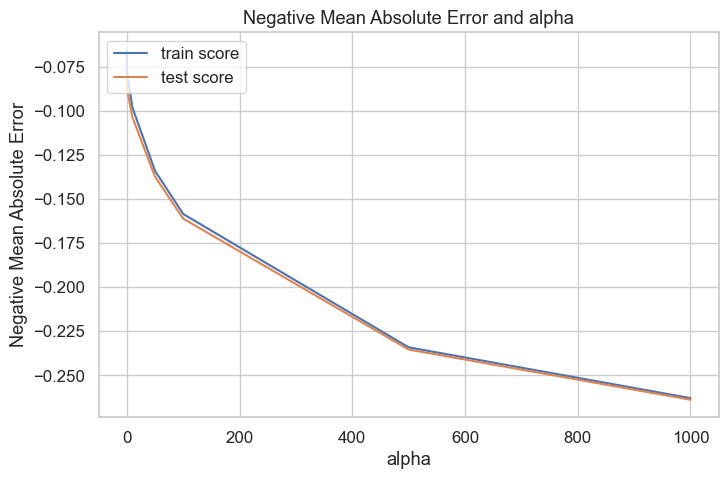

In [73]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that alpha is somewhere between 0- 20 So selecting parameters according to that

In [74]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002800,0.000749,0.001879,4.659084e-04,0.001,{'alpha': 0.001},-0.075379,-0.085174,-0.089332,-0.089267,...,-0.082073,0.007440,2,-0.065113,-0.066514,-0.064308,-0.065767,-0.065807,-0.065502,0.000744
1,0.002526,0.000441,0.001199,4.385143e-04,0.01,{'alpha': 0.01},-0.076442,-0.085105,-0.089753,-0.088015,...,-0.081912,0.007416,1,-0.065680,-0.066563,-0.064798,-0.066206,-0.066363,-0.065922,0.000634
2,0.002797,0.000400,0.001190,4.050272e-04,1.0,{'alpha': 1.0},-0.089776,-0.087159,-0.099047,-0.086598,...,-0.088766,0.005840,3,-0.081481,-0.071681,-0.078975,-0.082405,-0.083592,-0.079627,0.004253
3,0.002600,0.000490,0.001600,4.898235e-04,2.0,{'alpha': 2.0},-0.090602,-0.089521,-0.101966,-0.089256,...,-0.091131,0.005836,4,-0.084910,-0.075593,-0.081873,-0.086033,-0.086911,-0.083064,0.004105
4,0.002600,0.000490,0.001600,4.899014e-04,3.0,{'alpha': 3.0},-0.091475,-0.091354,-0.104082,-0.091603,...,-0.093004,0.005865,5,-0.087501,-0.078989,-0.084275,-0.088693,-0.089337,-0.085759,0.003807
5,0.003001,0.000003,0.001373,4.599897e-04,4.0,{'alpha': 4.0},-0.092537,-0.093312,-0.106066,-0.093696,...,-0.094827,0.005914,6,-0.089676,-0.081765,-0.086384,-0.090832,-0.091467,-0.088025,0.003587
6,0.002600,0.000490,0.001000,8.609519e-07,5.0,{'alpha': 5.0},-0.093748,-0.095051,-0.107759,-0.095524,...,-0.096512,0.005893,7,-0.091624,-0.084209,-0.088310,-0.092684,-0.093390,-0.090044,0.003398
7,0.003187,0.000373,0.001938,1.234300e-04,6.0,{'alpha': 6.0},-0.094861,-0.096705,-0.109343,-0.097166,...,-0.098096,0.005868,8,-0.093452,-0.086421,-0.090062,-0.094384,-0.095118,-0.091887,0.003235
8,0.002400,0.000490,0.001800,4.001379e-04,7.0,{'alpha': 7.0},-0.096027,-0.098274,-0.110742,-0.098768,...,-0.099607,0.005801,9,-0.095153,-0.088469,-0.091685,-0.096013,-0.096725,-0.093609,0.003098
9,0.002116,0.000230,0.001001,3.036071e-06,8.0,{'alpha': 8.0},-0.097230,-0.099821,-0.111967,-0.100268,...,-0.101041,0.005696,10,-0.096720,-0.090363,-0.093229,-0.097559,-0.098304,-0.095235,0.002993


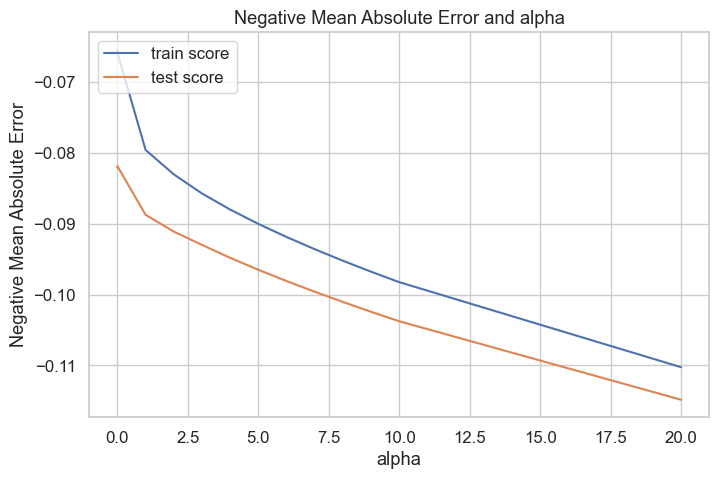

In [76]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that the optimal alpha value is between 0-2

In [77]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=0.01)
 The best r2 score is obtained at alpha 0.01


In [78]:
# Model building using optimal alpha
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

Ridge(alpha=0.01)

In [79]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the variable is negatively related to the target variable Sale price."For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in reality the variable with -0.1 is more important to predict Sale price rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [80]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,6.858800,6.858800
67,MSZoning_RM,2.969938,2.969938
68,Street_Pave,2.823709,2.823709
70,LotShape_IR3,2.695100,2.695100
72,LandContour_HLS,2.683479,2.683479
66,MSZoning_RL,2.624948,2.624948
69,LotShape_IR2,2.620848,2.620848
71,LotShape_Reg,2.513939,2.513939
58,MSSubClass_85,-1.666734,1.666734
16,BsmtUnfSF,0.737276,0.737276


In [81]:
from sklearn import metrics
# Prediction using ridge regression

metric = []
y_train_ridge_pred = ridge.predict(X_train)
r2_train_lr = round(r2_score(y_train, y_train_ridge_pred),4)
mse_train_lr = round(mean_squared_error(y_train,y_train_ridge_pred),4)
print("Ridge regression train r2: ",r2_train_lr)
print("Ridge regression train RMSE: ",mse_train_lr)

y_test_ridge_pred = ridge.predict(X_test)
r2_test_lr = round(r2_score(y_test, y_test_ridge_pred),4)
mse_test_lr = round(mean_squared_error(y_test,y_test_ridge_pred),4)
print("Ridge regression test r2: ",r2_test_lr)
print("Ridge regression test RMSE: ",mse_test_lr)


metric.append(r2_train_lr)
metric.append(r2_test_lr)
metric.append(mse_train_lr**0.5)
metric.append(mse_test_lr**0.5)

Ridge regression train r2:  0.9469
Ridge regression train RMSE:  0.0083
Ridge regression test r2:  0.8681
Ridge regression test RMSE:  0.0217


Lasso Regression Model

In [82]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [84]:
lasso = Lasso(alpha=0.0001)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [85]:
lasso.coef_

array([ 0.00000000e+00,  3.78297062e-01,  4.68857849e-01,  2.80132603e-01,
        3.16513328e-01,  7.30731232e-02,  5.69291501e-02,  6.49547203e-02,
        2.41458672e-01,  0.00000000e+00, -0.00000000e+00,  3.95613900e-01,
        3.62944395e-02,  0.00000000e+00, -3.06722010e-02,  1.52414761e+00,
        1.26619896e-01, -1.34966907e-01,  6.70000449e-02,  1.84776432e-01,
        2.26817231e-01,  0.00000000e+00,  1.49649851e-01,  8.32549230e-02,
        4.70155791e-02,  6.61595131e-02,  7.39343418e-02, -8.86145886e-02,
       -7.67357674e-02, -2.33854310e-02, -2.36191865e-02, -1.37327097e-01,
       -1.05559703e-01, -4.30053625e-02,  3.14087580e-01,  3.28198827e-01,
        3.34901839e-01,  2.75462984e-01,  1.15917918e-01, -0.00000000e+00,
        2.13422846e-02,  0.00000000e+00,  6.51955688e-02,  1.40428566e-01,
       -6.96286674e-02,  8.93264461e-02,  1.10435349e-01,  7.52717883e-02,
        4.86800761e-02,  2.59968151e-02,  7.11437691e-02,  3.90896441e-02,
        3.16389730e-02,  

In [86]:

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression train MSE:",mean_squared_error(y_train, y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))
print("Lasso Regression test MSE:",mean_squared_error(y_test, y_test_pred))

Lasso Regression train r2: 0.9392332214933954
Lasso Regression train MSE: 0.009549156847993522
Lasso Regression test r2: 0.8733948210483793
Lasso Regression test MSE: 0.020866404177651832


In [87]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020527,0.002876,0.002065,6.456993e-04,0.0001,{'alpha': 0.0001},-0.080414,-0.086080,-0.090957,-0.086505,...,-0.082714,0.007356,1,-0.069729,-0.067859,-0.068801,-0.069624,-0.070623,-0.069327,0.000934
1,0.004200,0.000749,0.001399,4.893570e-04,0.001,{'alpha': 0.001},-0.091743,-0.092246,-0.105615,-0.092399,...,-0.094483,0.005610,2,-0.092889,-0.079132,-0.088853,-0.092857,-0.094440,-0.089634,0.005567
2,0.002200,0.000400,0.001400,4.899992e-04,0.01,{'alpha': 0.01},-0.134449,-0.148783,-0.152732,-0.137652,...,-0.144720,0.007265,3,-0.145489,-0.142872,-0.140986,-0.142183,-0.146074,-0.143521,0.001951
3,0.002200,0.000400,0.001000,3.693565e-07,0.05,{'alpha': 0.05},-0.276115,-0.274670,-0.261929,-0.262337,...,-0.272805,0.010036,4,-0.272566,-0.270082,-0.275139,-0.273713,-0.269908,-0.272282,0.002038
4,0.002400,0.000490,0.001600,8.000851e-04,0.1,{'alpha': 0.1},-0.312646,-0.312179,-0.306816,-0.295412,...,-0.310608,0.009883,5,-0.310026,-0.309197,-0.310983,-0.313371,-0.306761,-0.310068,0.002165


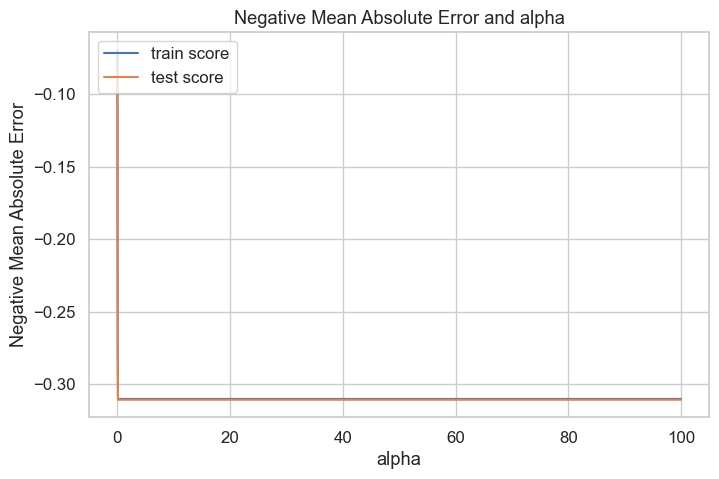

In [88]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

This graphs shows that alpha value might be very less than 1

In [89]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1e-05}


In [91]:
lasso = Lasso(alpha=1e-05)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1e-05)

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017393,0.004276,0.001332,0.000559,0.00001,{'alpha': 1e-05},-0.075647,-0.085233,-0.089334,-0.088954,...,-0.082013,0.007433,1,-0.065382,-0.066601,-0.064420,-0.065949,-0.065918,-0.065654,0.000728
1,0.017514,0.002501,0.001800,0.000400,0.0001,{'alpha': 0.0001},-0.080414,-0.086080,-0.090957,-0.086505,...,-0.082714,0.007356,2,-0.069729,-0.067859,-0.068801,-0.069624,-0.070623,-0.069327,0.000934
2,0.003800,0.000749,0.001601,0.000490,0.001,{'alpha': 0.001},-0.091743,-0.092246,-0.105615,-0.092399,...,-0.094483,0.005610,3,-0.092889,-0.079132,-0.088853,-0.092857,-0.094440,-0.089634,0.005567
3,0.002400,0.000490,0.001600,0.000490,0.01,{'alpha': 0.01},-0.134449,-0.148783,-0.152732,-0.137652,...,-0.144720,0.007265,4,-0.145489,-0.142872,-0.140986,-0.142183,-0.146074,-0.143521,0.001951
4,0.002245,0.000491,0.001600,0.000490,0.05,{'alpha': 0.05},-0.276115,-0.274670,-0.261929,-0.262337,...,-0.272805,0.010036,5,-0.272566,-0.270082,-0.275139,-0.273713,-0.269908,-0.272282,0.002038


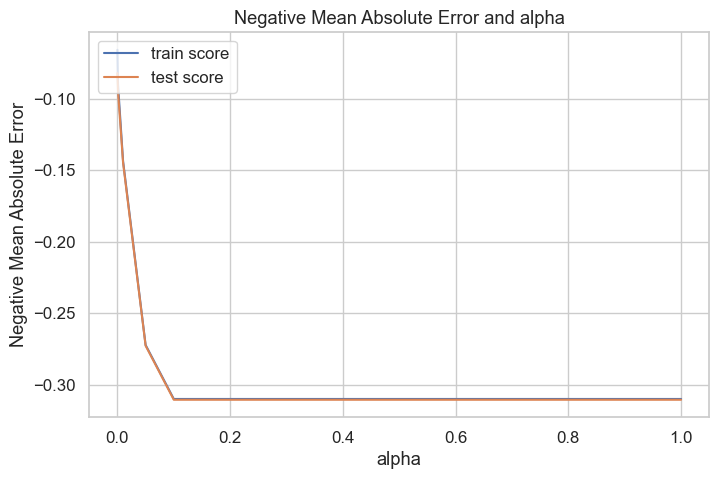

In [93]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [94]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-05}

In [95]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)
lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Lasso()

In [96]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-05}

In [97]:
lasso = Lasso(alpha=1e-05)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1e-05)

In [98]:
lasso.coef_

array([ 1.22076633e-01,  5.35630705e-01,  4.07322995e-01,  2.67813027e-01,
        3.17832863e-01,  7.74210983e-02,  4.19794068e-02,  5.59396725e-02,
        4.10085181e-01, -0.00000000e+00,  1.25564011e-02,  5.39832381e-01,
        1.06069751e+00,  5.16318176e-01,  9.34963998e-02,  3.24569115e-01,
        8.54075097e-02, -1.62968368e-01,  6.46848866e-02,  2.19249546e-01,
        1.32227995e-01,  8.66921926e-02,  1.46410343e-01,  8.22335972e-02,
        5.86800419e-02,  7.41766096e-02,  7.58155013e-02, -8.32193960e-02,
       -2.53176572e-01, -1.34089728e-01, -3.69617577e-02, -1.13369800e-01,
       -7.82953480e-02, -6.17516882e-02,  4.11921378e-01,  4.20194838e-01,
        4.14577527e-01,  3.74917696e-01,  1.37641205e-01, -4.57353868e-02,
       -6.69889002e-02,  8.44205305e-02,  6.41545629e-02,  1.38452092e-01,
       -9.40687442e-02,  8.23321203e-02,  9.50990157e-02,  9.14101552e-02,
        6.18109888e-02,  5.05684180e-02,  8.35839795e-02,  5.98895932e-02,
        5.60851918e-02,  

In [99]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression train MSE:",mean_squared_error(y_train, y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))
print("Lasso Regression test MSE:",mean_squared_error(y_test, y_test_pred))

Lasso Regression train r2: 0.9472257060493099
Lasso Regression train MSE: 0.008293182934199523
Lasso Regression test r2: 0.8676157519804097
Lasso Regression test MSE: 0.021818880150130802


#### Building Lasso regression model with optimal alpha value

In [100]:
# After performing grid search we found the same alpha that we use before
lasso = Lasso(alpha=1e-05)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric1 = []
r2_train_lr = round(r2_score(y_train, y_train_pred),4)
mse_train_lr = round(mean_squared_error(y_train,y_train_pred),4)
print("Lasso regression train r2: ",r2_train_lr)
print("Lasso Regression train MSE: ",mse_train_lr)

r2_test_lr = round(r2_score(y_test, y_test_pred),4)
mse_test_lr = round(mean_squared_error(y_test,y_test_pred),4)
print("Lasso regression train r2: ",r2_test_lr)
print("Lasso Regression test MSE: ",mse_test_lr)


metric1.append(r2_train_lr)
metric1.append(r2_test_lr)
metric1.append(mse_train_lr**0.5)
metric1.append(mse_test_lr**0.5)

Lasso regression train r2:  0.9472
Lasso Regression train MSE:  0.0083
Lasso regression train r2:  0.8676
Lasso Regression test MSE:  0.0218


In [101]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [102]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,6.681246,6.681246
1,LotArea,0.122077,0.122077
2,OverallQual,0.535631,0.535631
3,OverallCond,0.407323,0.407323
4,YearBuilt,0.267813,0.267813
5,YearRemodAdd,0.317833,0.317833
6,MasVnrArea,0.077421,0.077421
7,BsmtExposure,0.041979,0.041979
8,BsmtFinSF1,0.055940,0.055940
9,BsmtFinSF2,0.410085,0.410085


In [103]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,6.681246,6.681246
67,RoofMatl_Metal,3.186275,3.186275
68,RoofMatl_Roll,3.039109,3.039109
70,RoofMatl_WdShake,2.887829,2.887829
72,Exterior1st_AsphShn,2.872657,2.872657
69,RoofMatl_Tar&Grv,2.826127,2.826127
66,RoofMatl_Membran,2.813687,2.813687
71,RoofMatl_WdShngl,2.713555,2.713555
58,Condition2_RRAe,-1.701285,1.701285
13,2ndFlrSF,1.060698,1.060698


Data Modeling and evaluation - Final model

In [104]:
## Lets observe the changes in the coefficients after regularization

betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(90)

,Ridge,Lasso
LotFrontage,0.103655,0.122077
LotArea,0.533369,0.535631
OverallQual,0.409431,0.407323
OverallCond,0.268007,0.267813
YearBuilt,0.317498,0.317833
YearRemodAdd,0.076539,0.077421
MasVnrArea,0.045821,0.041979
BsmtExposure,0.058052,0.055940
BsmtFinSF1,0.453808,0.410085
BsmtFinSF2,0.016631,-0.000000


In [105]:
# Creating a table which contain all the metrics

rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric
        }

rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric1, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.946900,0.947200
1,R2 Score (Test),0.868100,0.867600
2,MSE (Train),0.091104,0.091104
3,MSE (Test),0.147309,0.147648


We will make use of Lasso Regression model as it is using less number of features by eliminating less noise fetaures which is not contributing to the model and giving almost the same accuracy as Ridge regression.

##### Step7: Model Inference and Conclusion

The company wants to know:

Which variables are significant in predicting the price of a house:

* LotFrontage : If the house Linear feet of street connected to property area increase then the Price increase.

* RoofMatl_Metal : If the Roof material is metal then the SalePrice is higher.

* Exterior1st_AsphShn : IF the house Exterior1st is Asphalt Shingles then price is higher.

* RoofMatl_Roll: If the Roof material is roll then the SalePrice is higher.

* RoofMatl_WdShake : If the Roof material is Wood Shakes then the SalePrice is higher.

* RoofMatl_Membran : If the Roof material is Membrane then the SalePrice is higher.

* RoofMatl_WdShngl : If the Roof material is Wood Shingles then the SalePrice is higher.

* RoofMatl_Tar&Grv : If the Roof material is Wood Gravel & Tar then the SalePrice is higher.

* Condition2_RRAe: If the house is Adjacent to East-West Railroad then price is less.

* 2ndFlrSF: If the house has more Second floor square feet then price is higher.

How well those variables describe the price of a house.

* These varibles tells about the linear relation with respect the price by which the company can improve ther sales. For instance they can concentrate in investing properties wich may have high SalePrice in future


Optimal value of alpha:
For Ridge regression :0.01
For Lasso Regression :0.0001

    
 
    
#### <u>Subjective Questions<u>
Question 1: Double the alpha values and evaluate model

For Ridge regression alpha is 0.01 and now doubling it and making it 0.02

In [106]:
# Model building using optimal alpha
ridge_modified = Ridge(alpha=0.02)
ridge_modified.fit(X_train, y_train)

Ridge(alpha=0.02)

In [107]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,6.858800,6.858800
67,MSZoning_RM,2.969938,2.969938
68,Street_Pave,2.823709,2.823709
70,LotShape_IR3,2.695100,2.695100
72,LandContour_HLS,2.683479,2.683479
66,MSZoning_RL,2.624948,2.624948
69,LotShape_IR2,2.620848,2.620848
71,LotShape_Reg,2.513939,2.513939
58,MSSubClass_85,-1.666734,1.666734
16,BsmtUnfSF,0.737276,0.737276


In [108]:
y_train_pred = ridge_modified.predict(X_train)
y_test_pred = ridge_modified.predict(X_test)

metric2 = []
r2_train_lr = round(r2_score(y_train, y_train_pred),4)
mse_train_lr = round(mean_squared_error(y_train,y_train_pred),4)
print("Ridge regression train r2: ",r2_train_lr)
print("Ridge Regression train MSE: ",mse_train_lr)

r2_test_lr = round(r2_score(y_test, y_test_pred),4)
mse_test_lr = round(mean_squared_error(y_test,y_test_pred),4)
print("Ridge regression train r2: ",r2_test_lr)
print("Ridge Regression test MSE: ",mse_test_lr)


metric2.append(r2_train_lr)
metric2.append(r2_test_lr)
metric2.append(mse_train_lr**0.5)
metric2.append(mse_test_lr**0.5)

Ridge regression train r2:  0.946
Ridge Regression train MSE:  0.0085
Ridge regression train r2:  0.8694
Ridge Regression test MSE:  0.0215


For Lasso regression alpha is 0.00001 and not doubling it and making it 0.00002

In [109]:
# Model building using optimal alpha
lasso_modified = Lasso(alpha=0.00002)
lasso_modified.fit(X_train, y_train)

Lasso(alpha=2e-05)

In [110]:
y_train_pred = lasso_modified.predict(X_train)
y_test_pred = lasso_modified.predict(X_test)

metric3 = []
r2_train_lr = round(r2_score(y_train, y_train_pred),4)
mse_train_lr = round(mean_squared_error(y_train,y_train_pred),4)
print("Lasso regression train r2: ",r2_train_lr)
print("Lasso Regression train MSE: ",mse_train_lr)

r2_test_lr = round(r2_score(y_test, y_test_pred),4)
mse_test_lr = round(mean_squared_error(y_test,y_test_pred),4)
print("Lasso regression train r2: ",r2_test_lr)
print("Lasso Regression test MSE: ",mse_test_lr)


metric3.append(r2_train_lr)
metric3.append(r2_test_lr)
metric3.append(mse_train_lr**0.5)
metric3.append(mse_test_lr**0.5)

Lasso regression train r2:  0.947
Lasso Regression train MSE:  0.0083
Lasso regression train r2:  0.8687
Lasso Regression test MSE:  0.0216


In [111]:
# Creating a table which contain all the metrics

rg_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Ridge Regression': metric
        }

rg_metric = pd.DataFrame(rg_table ,columns = ['Metric', 'Ridge Regression'] )

ls_metric = pd.Series(metric1, name = 'Lasso Regression')

rg1_metric = pd.Series(metric2, name = 'Ridge Regression R-2')

ls1_metric = pd.Series(metric3, name = 'Lasso Regression R-2')

final_metric = pd.concat([rg_metric, ls_metric, rg1_metric, ls1_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression,Ridge Regression R-2,Lasso Regression R-2
0,R2 Score (Train),0.946900,0.947200,0.946000,0.947000
1,R2 Score (Test),0.868100,0.867600,0.869400,0.868700
2,MSE (Train),0.091104,0.091104,0.092195,0.091104
3,MSE (Test),0.147309,0.147648,0.146629,0.146969


In [112]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [113]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,6.681246,6.681246
67,RoofMatl_Metal,3.186275,3.186275
68,RoofMatl_Roll,3.039109,3.039109
70,RoofMatl_WdShake,2.887829,2.887829
72,Exterior1st_AsphShn,2.872657,2.872657
69,RoofMatl_Tar&Grv,2.826127,2.826127
66,RoofMatl_Membran,2.813687,2.813687
71,RoofMatl_WdShngl,2.713555,2.713555
58,Condition2_RRAe,-1.701285,1.701285
13,2ndFlrSF,1.060698,1.060698


Question 3:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Dropping the first five important predictors

In [114]:
X_train_new = X_train.drop(['LotFrontage','RoofMatl_Metal','Exterior1st_AsphShn','RoofMatl_Roll','RoofMatl_WdShake'],axis=1)
X_test_new = X_test.drop(['LotFrontage','RoofMatl_Metal','Exterior1st_AsphShn','RoofMatl_Roll','RoofMatl_WdShake'],axis=1)

X_test_new.head()
X_train_new.shape

(1021, 85)

In [115]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=1e-05),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016471,1.443314e-03,0.001800,4.000187e-04,0.0001,{'alpha': 0.0001},-0.089674,-0.086766,-0.099820,-0.088485,...,-0.088558,0.006955,1,-0.078705,-0.068054,-0.077992,-0.078714,-0.081460,-0.076985,0.004621
1,0.003000,6.323344e-04,0.001201,3.995444e-04,0.001,{'alpha': 0.001},-0.091743,-0.092246,-0.105615,-0.092401,...,-0.094483,0.005610,2,-0.092889,-0.079132,-0.088853,-0.092858,-0.094440,-0.089634,0.005567
2,0.002000,2.780415e-07,0.002000,3.989506e-07,0.01,{'alpha': 0.01},-0.134449,-0.148783,-0.152732,-0.137652,...,-0.144720,0.007265,3,-0.145489,-0.142872,-0.140986,-0.142183,-0.146074,-0.143521,0.001951


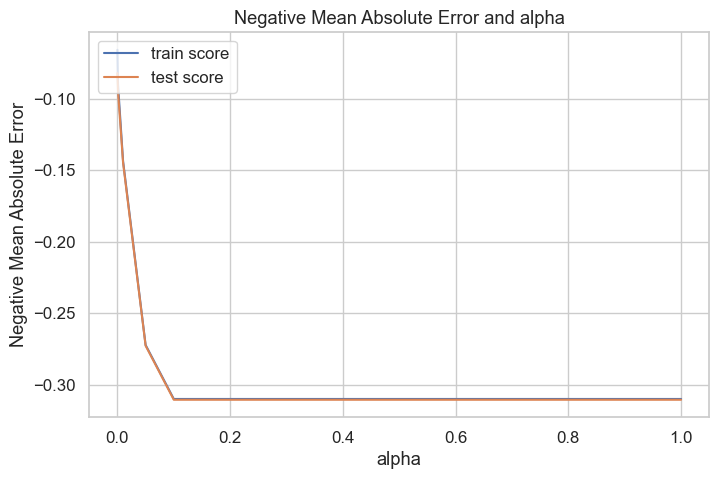

In [117]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [118]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-05}

In [122]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=1e-05)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

r2_train_lr = round(r2_score(y_train, y_train_pred),4)
mse_train_lr = round(mean_squared_error(y_train,y_train_pred),4)
print("Lasso Regression train r2: ",r2_train_lr)
print("Lasso Regression train MSE: ",mse_train_lr)

r2_test_lr = round(r2_score(y_test, y_test_pred),4)
mse_test_lr = round(mean_squared_error(y_test,y_test_pred),4)
print("Lasso Regression train r2: ",r2_test_lr)
print("Lasso Regression test MSE: ",mse_test_lr)

Lasso Regression train r2:  0.9178
Lasso Regression train MSE:  0.0129
Lasso Regression train r2:  0.862
Lasso Regression test MSE:  0.0227


In [120]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [121]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,9.172316,9.172316
57,Condition2_RRAe,-1.429154,1.429154
12,2ndFlrSF,0.995141,0.995141
66,RoofMatl_Tar&Grv,0.577244,0.577244
68,Exterior1st_BrkComm,0.513965,0.513965
